In [1]:
import numpy as np
import sys
import os
import glob
import csv
import re
import time
import copy

In [8]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits import mplot3d

import sys
sys.path.append("..")

from sicm import io, plots, analysis, utils

%matplotlib inline
plt.style.use("seaborn") # plt.style.available

In [7]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"

## Cyclic Voltametry

In [8]:
# Locals
exp_name = "cv2"

In [9]:
files, date = io.get_files(datadir, exp_name)
result = io.load_result(files)

Avaliable data:
dict_keys(['Current1(A)', 'dt(s)', 'LineNumber', 'V1(V)', 'Z(um)'])
Number of datapoints = (7802,)


Text(0, 0.5, 'LineNumber')

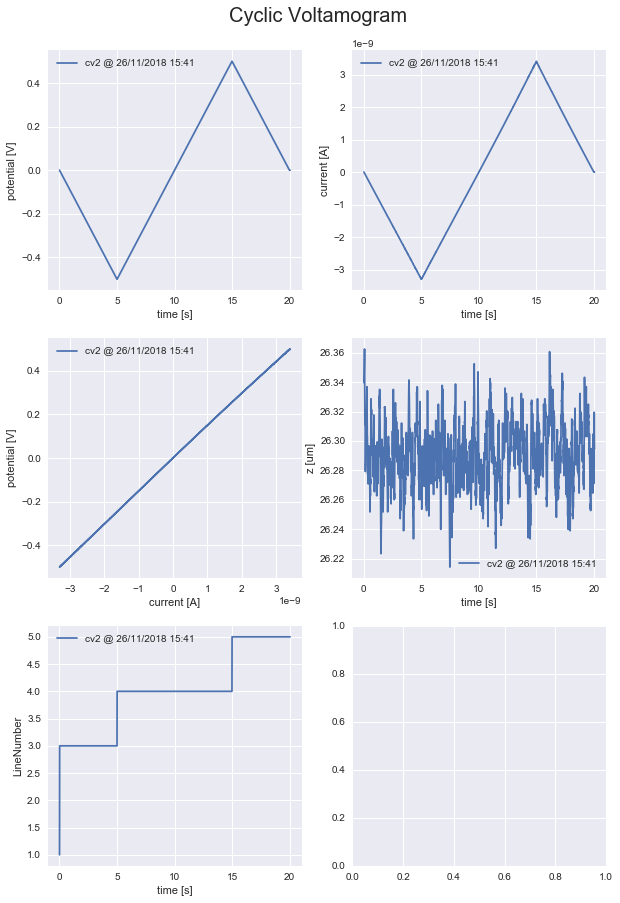

In [10]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 15))
axs = axs.flatten()
fig.suptitle("Cyclic Voltamogram", size = 20, y = 0.92)

axs[0].plot(np.cumsum(result["dt(s)"]), result["V1(V)"])
axs[0].legend(["{} @ {}".format(exp_name, date)])
axs[0].set_xlabel("time [s]")
axs[0].set_ylabel("potential [V]")

axs[1].plot(np.cumsum(result["dt(s)"]), result["Current1(A)"])
axs[1].legend(["{} @ {}".format(exp_name, date)])
axs[1].set_xlabel("time [s]")
axs[1].set_ylabel("current [A]")

axs[2].plot(result["Current1(A)"], result["V1(V)"])
axs[2].legend(["{} @ {}".format(exp_name, date)])
axs[2].set_xlabel("current [A]")
axs[2].set_ylabel("potential [V]")

axs[3].plot(np.cumsum(result["dt(s)"]), result["Z(um)"])
axs[3].legend(["{} @ {}".format(exp_name, date)])
axs[3].set_xlabel("time [s]")
axs[3].set_ylabel("z [um]")

axs[4].plot(np.cumsum(result["dt(s)"]), result["LineNumber"])
axs[4].legend(["{} @ {}".format(exp_name, date)])
axs[4].set_xlabel("time [s]")
axs[4].set_ylabel("LineNumber")


# not used
# xticks = ax.get_xticks(); xmin = np.min(xticks); xmax = np.max(xticks);
# yticks = ax.get_yticks(); ymin = np.min(yticks); ymax = np.max(yticks);
# ax.set_xticks(np.arange(xmin, xmax,  (xmax-xmin) / 10))
# ax.set_yticks(np.arange(ymin, ymax,  (ymax-ymin) / 10))

## Hopping Scan

In [11]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
import numpy as np

%load_ext autoreload
%autoreload 2

In [119]:
# Globals
datadir = "C:/Users/mholub/data/sicm/2018/11_Nov/26"
datadir = "S:/UsersData/Martin/2018/12_Dec/12/sicm/exp2"
# datadir = "S:/UsersData/Martin/2018/12_Dec/12/sicm/exp1"
datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# datadir = "S:/UsersData/Martin/2018/12_Dec/21"
# Locals
exp_name = "scan3"
exp_name = "scan_hopping_qtf_current_slow"
# exp_name = "scan_hopping_qtf_current"
exp_name = "scan1"
# exp_name = "scan2_tip_again_perhaps_broken"
# exp_name = "scan3_long_things_go_crazy_at_end"

In [120]:
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

uniqs, cnts = np.unique(result_["LineNumber"], return_counts=True)
linenos = np.arange(5, max(uniqs), 3)
result, idxs = io.downsample_to_linenumber(result_, linenos)

Avaliable data:
dict_keys(['dt(s)', 'X(um)', 'FeedbackType', 'V1(V)', 'Y(um)', 'LineNumber', 'Z(um)', 'Current1(A)'])
Number of datapoints = (233185,)
Number of datapoints = 195350


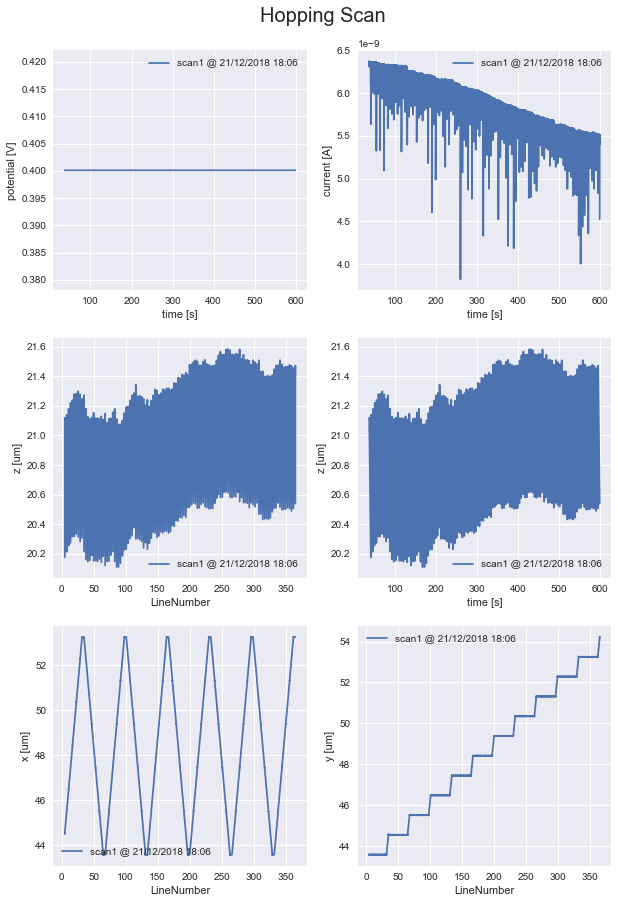

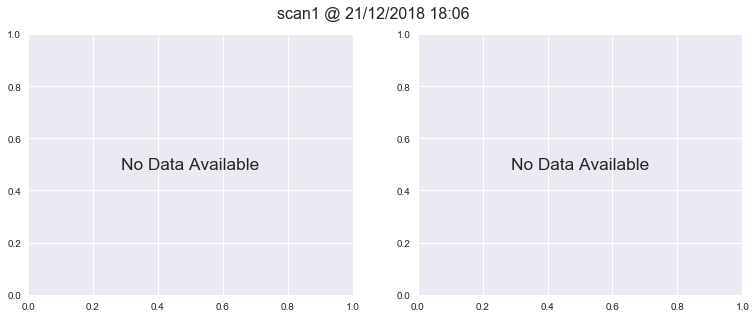

In [121]:
# sel = idxs # slect only last or first
sel = np.arange(0, len(result["LineNumber"])//1) # select all
plots.plot_hopping_scan(result, sel, exp_name, date)

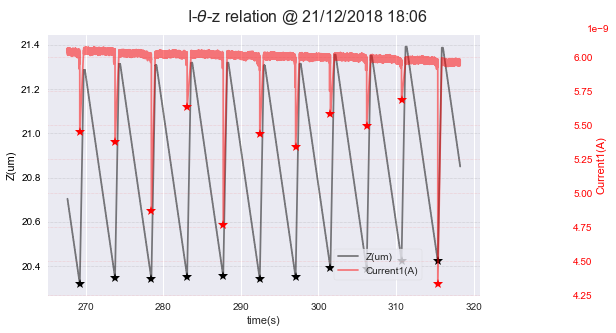

In [123]:
# Select some range for proecssing
sel = np.arange(int(4.1*len(result["LineNumber"])//10),
                int(5*len(result["LineNumber"])//10))
subkeys = set(['Z(um)', 'LockinPhase', 'Current1(A)', 'time(s)'])
subresult = {k:v[sel] for k,v in result.items() if k in subkeys}
xkey = "time(s)"
idxs_ = idxs[np.isin(idxs, sel)]
idxs_ = idxs_ - sel[0]
# Should have detrending also for current!
plots.plot_approach(subresult, xkey, idxs_, date = date)

In [124]:
sel = np.arange(0, len(next(iter(result.values()))))
subkeys = set(['Z(um)', 'LockinPhase', 'Current1(A)', 'time(s)'])
subresult = {k:v[sel] for k,v in result.items() if k in subkeys}
xkey = "time(s)"
_, annot = analysis.annotate_peaks(subresult, xkey, idxs, 250)
io.save_dataframe(annot, [datadir, exp_name + "_annot"])

Saved dataframe to S:/UsersData/Martin/2018/12_Dec/21\scan1_annot.pkl.


'S:/UsersData/Martin/2018/12_Dec/21\\scan1_annot.pkl'

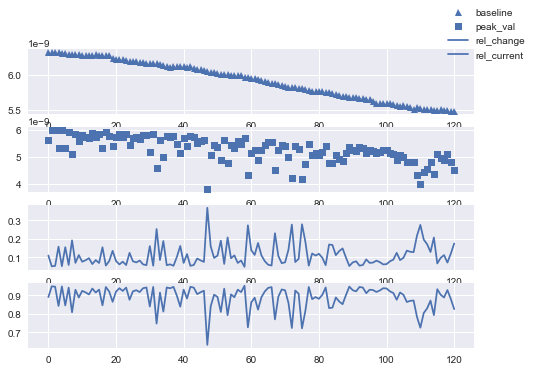

In [125]:
# quick check that things make sense
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(411)
ax1.plot(annot["Current1(A)"]["baseline"], '^', label = "baseline")
ax2 = fig.add_subplot(412)
ax2.plot(annot["Current1(A)"]["peaks_val"], 's', label = "peak_val")
ax3 = fig.add_subplot(413)
ax3.plot(annot["Current1(A)"]["rel_change"], label = "rel_change")
ax3 = fig.add_subplot(414)
ax3.plot(annot["Current1(A)"]["peaks_val"]/annot["Current1(A)"]["baseline"],
         label = "rel_current")
fig.legend()

# Getting noise level

In [9]:
import sys
sys.path.append("..")

from sicm import io, plots, analysis
import numpy as np

%load_ext autoreload
%autoreload 2

## Do it from `Watch Current` Data

In [22]:
datadir = "S:/UsersData/Martin/2019/01_Jan/07"
exp_name = "0v_noise_level2"
files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

Avaliable data:
dict_keys(['Current1(A)', 'LineNumber', 'dt(s)', 'V1(V)'])
Number of datapoints = (206369,)


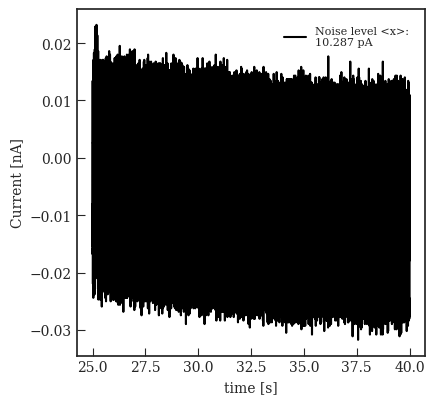

In [25]:
sig = analysis.Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.get_noise_level(range = [25.0, 40.0])

## Do it from `Approach Data`

In [40]:
datadir = "S:/UsersData/Martin/2019/01_Jan/07"
exp_name = "approach_too_low_thresh_perhaps"

files, date = io.get_files(datadir, exp_name)
result_ = io.load_result(files, exp_name)

# get idea of range to plot
# plots.plot_hopping_scan(result_, None, exp_name, date)

Avaliable data:
dict_keys(['V2(V)', 'Current1(A)', 'dt(s)', 'V1(V)', 'LineNumber', 'Z(um)'])
Number of datapoints = (291925,)


Saved figure to noise_level.pdf.


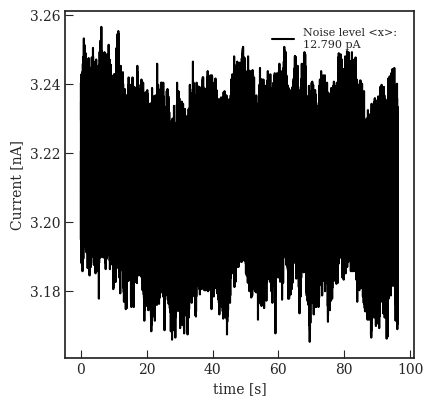

In [43]:
sig = analysis.Signal(x = np.cumsum(result_["dt(s)"]), 
                      y = result_["Current1(A)"])
sig.get_noise_level(range = [0, -1])